# Support Vector Machine

**In this example we will implement support vector machine to MNIST (Handwritten digits dataset) to do classification task. Please try to play around with some other models that suggested in Chapter 6 (Decision Tree, Random Forest,...) to practice and obseve more.**

In [217]:
from sklearn.datasets import load_digits
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

In [232]:
#Load dataset from sklearn 
mnist = load_digits()
X, y = mnist.data, mnist.target

In [233]:
#split into train and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
#Checking data shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [235]:
print(X_train[0].shape) #This mean load model return a (8x8) image and reshape it to one colum (64,)

(64,)


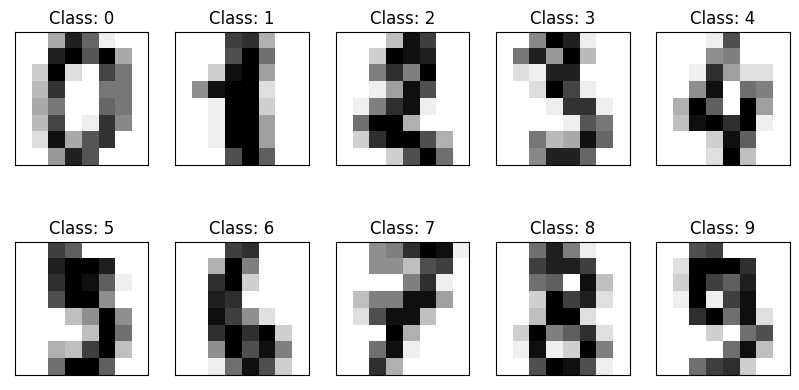

In [236]:
#Show 
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(8, 8), cmap='binary')
    axi.set(xticks=[], yticks=[], title="Class: {}".format(y[i]))
plt.show()

In [237]:
#prepare the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', gamma='auto'))])

In [238]:
#train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [239]:
#evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.980 (0.009)


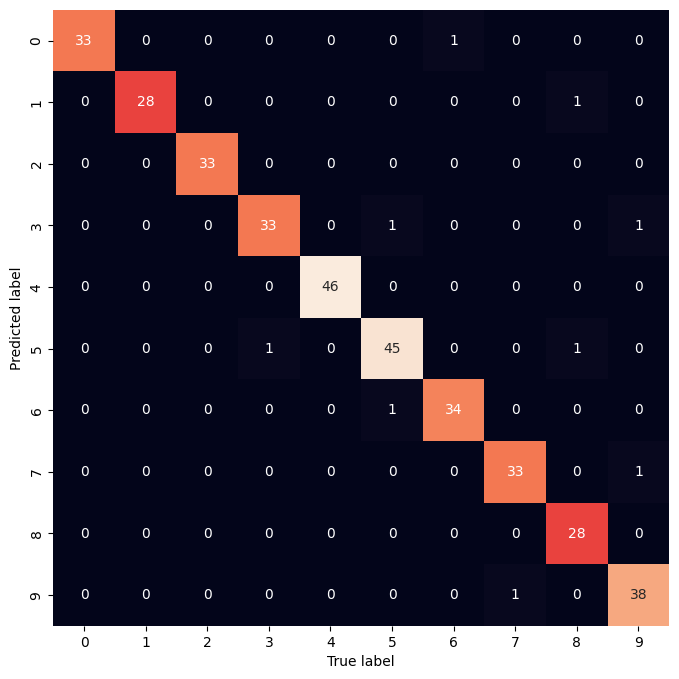

In [240]:
#Plot confusion matrix
y_pred = pipe.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=mnist.target_names, yticklabels=mnist.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



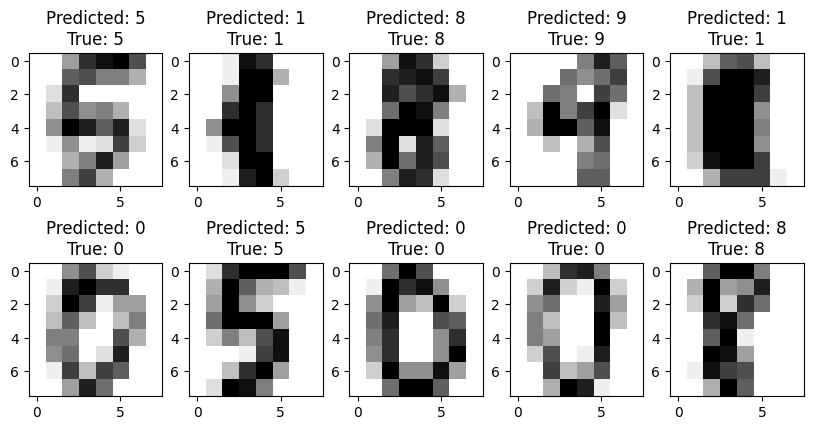

In [242]:
#Plot randomly some good predictions
import random
num_images = 10
random_indices = random.sample(range(len(X_test)), num_images)

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    index = random_indices[i]
    if y_pred[index] == y_test[index]:
        axi.imshow(X_test[index].reshape(8, 8), cmap='binary')
        axi.set_title("Predicted: " + str(y_pred[index]) + 
                       "\n" + "True: " + str(y_test[index]), 
                       color='black')
plt.show()

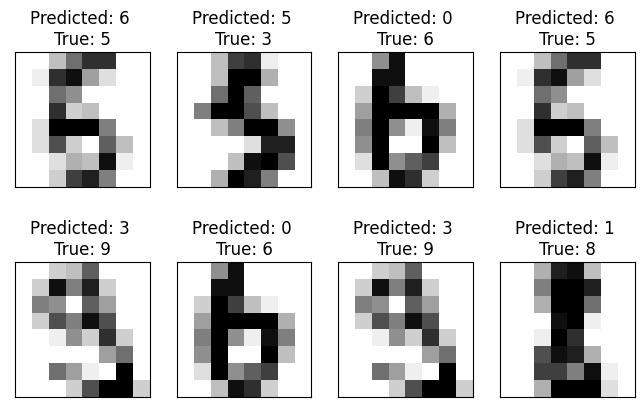

In [243]:
#Plot some incorrect predictions
misclassified_idx = np.where(y_pred != y_test)[0]
fig, ax = plt.subplots(2, 4, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    if i < len(misclassified_idx):
        idx = np.random.choice(misclassified_idx)
        axi.imshow(X_test[idx].reshape(8, 8), cmap='binary')
        axi.set_title("Predicted: %s \nTrue: %s" % (mnist.target_names[y_pred[idx]],mnist.target_names[y_test[idx]]))
    axi.set_xticks([])
    axi.set_yticks([])
plt.show()


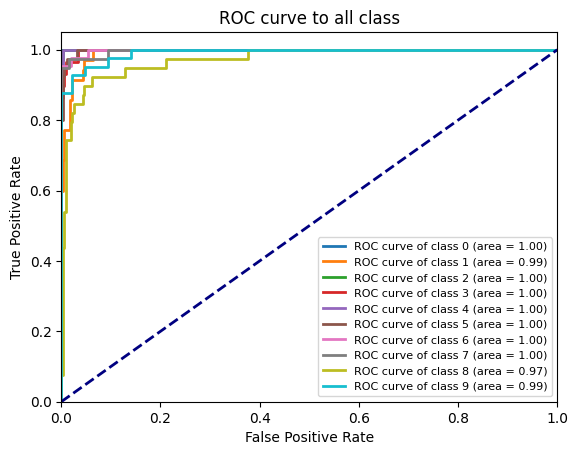

In [249]:
#Plot ROC curve (please when you run this code it will affect the result above so you need to rerun all the cell)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(pipe)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve to all class')
plt.legend(loc="lower right", prop={'size': 8})
plt.show()